# **6. 다양한 머신러닝 기법들**
---
* 출판사 : 생능 출판사( http://www.booksr.co.kr/ )
* 으뜸 파이썬 저자 : 강영민, 박동규, 김성수
*  소스코드 저장소 : https://github.com/dknife/ML2nd
*  저작권 : 본 노트북 코드는 자유롭게 배포가능하지만 위의 출판사, 저서, 저자표기와 함께 배포해 주십시오.
---

### **6.1 다항 회귀의 개념과 비선형 회귀**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns    # 시각화를 위하여 Seaborn 라이브러리를 이용함

data_loc = 'https://github.com/dknife/ML2nd/raw/main/data/'
eed_df = pd.read_csv(data_loc + 'energy_efficiency_data.csv')

eed_df.columns = [
    "Compactness", "Surface", "Wall", "Roof",
    "Height", "Orientation", "Glazing_Area",
    "Glazing_Area_Distribution", "Heating_Load", "Cooling_Load"
]

X = eed_df[["Compactness", "Surface", "Wall", "Roof",
           "Height", "Glazing_Area"]]
y = eed_df['Heating_Load']

print(X)
print(y)

     Compactness  Surface   Wall    Roof  Height  Glazing_Area
0           0.98    514.5  294.0  110.25     7.0           0.0
1           0.98    514.5  294.0  110.25     7.0           0.0
2           0.98    514.5  294.0  110.25     7.0           0.0
3           0.98    514.5  294.0  110.25     7.0           0.0
4           0.90    563.5  318.5  122.50     7.0           0.0
..           ...      ...    ...     ...     ...           ...
763         0.64    784.0  343.0  220.50     3.5           0.4
764         0.62    808.5  367.5  220.50     3.5           0.4
765         0.62    808.5  367.5  220.50     3.5           0.4
766         0.62    808.5  367.5  220.50     3.5           0.4
767         0.62    808.5  367.5  220.50     3.5           0.4

[768 rows x 6 columns]
0      15.55
1      15.55
2      15.55
3      15.55
4      20.84
       ...  
763    17.88
764    16.54
765    16.44
766    16.48
767    16.64
Name: Heating_Load, Length: 768, dtype: float64


In [4]:
from sklearn.preprocessing import PolynomialFeatures
poly_feature = PolynomialFeatures(degree = 3)
X_poly3 = poly_feature.fit_transform(X)

Mean squared error: 0.2485053231397862


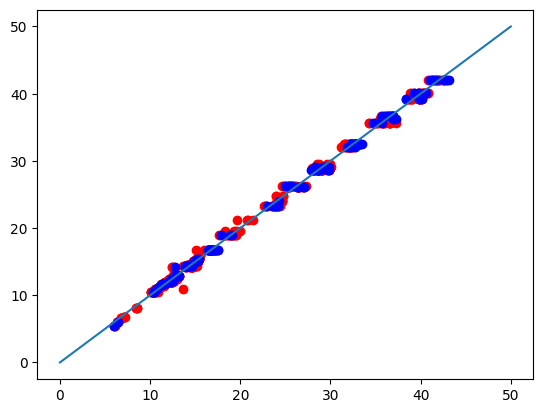

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train,X_test,y_train,y_test = train_test_split(X_poly3, y,\
                                                 test_size = 0.2)
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

y_hat_train = lin_model.predict(X_train)
y_hat_test = lin_model.predict(X_test)
plt.scatter(y_train, y_hat_train, color='r')
plt.scatter(y_test, y_hat_test, color='b')
plt.plot([0, 50], [0, 50])
print('Mean squared error:', mean_squared_error(y_test, y_hat_test))

### **6.2 다항 회귀의 문제점 - 과적합 위험과 폭발적인 복잡도 증가**

In [6]:
print('Mean squared error:', mean_squared_error(y_train, y_hat_train))

Mean squared error: 0.2436127299758446



testing 8


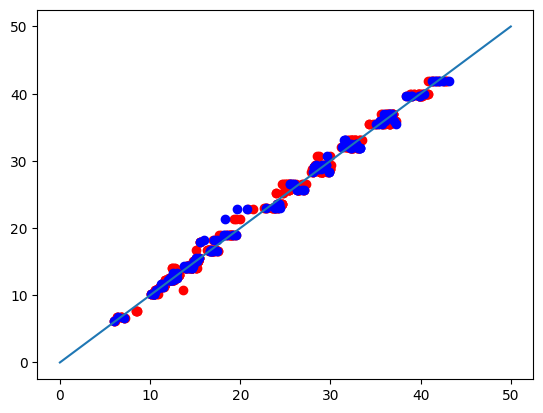

훈련 데이터(8차) Mean squared error: 0.41109578255737717
검증 데이터(8차) Mean squared error: 0.6212594559333038

testing 10


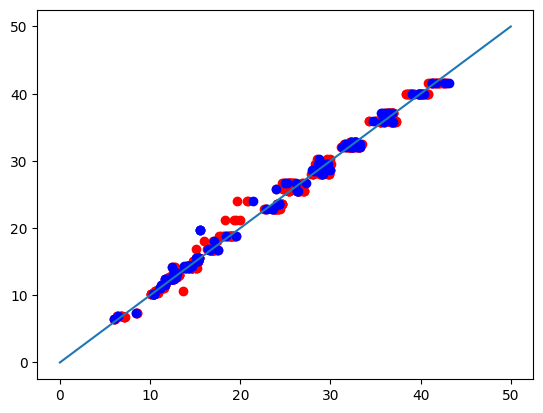

훈련 데이터(10차) Mean squared error: 0.5673564876849216
검증 데이터(10차) Mean squared error: 0.6379270238178347

testing 12


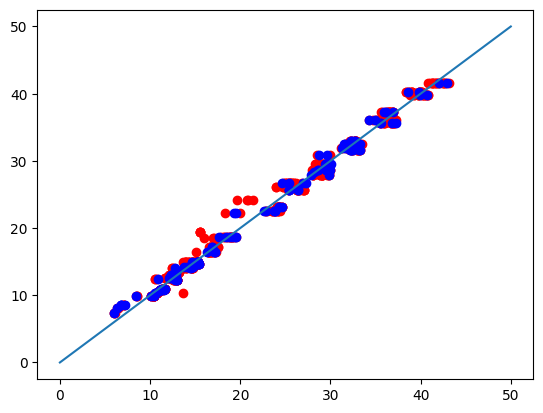

훈련 데이터(12차) Mean squared error: 0.8604047167612277
검증 데이터(12차) Mean squared error: 0.7476365103321012


In [7]:
degrees = [8, 10, 12]
high_degree_model = LinearRegression()

for degree in degrees:
    print(f'\ntesting {degree}')
    poly_feature_for_test = PolynomialFeatures(degree = degree)
    X_poly = poly_feature_for_test.fit_transform(X)

    X_train,X_test,y_train,y_test = train_test_split(X_poly, y, test_size = 0.2)

    high_degree_model.fit(X_train, y_train)

    y_hat_train = high_degree_model.predict(X_train)
    y_hat_test = high_degree_model.predict(X_test)

    plt.scatter(y_train, y_hat_train, color='r')
    plt.scatter(y_test, y_hat_test, color='b')

    plt.plot([0, 50], [0, 50])
    plt.show()
    print(f'훈련 데이터({degree}차) Mean squared error:', mean_squared_error(y_train, y_hat_train))
    print(f'검증 데이터({degree}차) Mean squared error:', mean_squared_error(y_test, y_hat_test))

In [8]:
X_poly.shape

(768, 18564)